# Topological Fractal Dimension of Protein-Protein Interaction Networks

## TFD for Path and Lattice Graphs

#### Load

In [1]:
from tfdppin import graphs
from tfdppin import TFD

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import time
import seaborn

### Study of TFD $d$ versus number of nodes $N$ (w/ and w/o PBC)

In [2]:
def d_vs_N(graph_builder, Nmin=10, Nmax=100, Nstep=5, PBC=False):
    N = np.arange(Nmin, Nmax, Nstep, dtype=int)
    d = np.zeros(len(N))
    
    tot_time = 0
    for idx, n in enumerate(N):
        print("TDF #{} of {}".format(idx+1, len(N)), end=" ")
        ti = time.time()
        
        Gl = graph_builder(n, PBC)
        p, lb, Nb  = TFD.tfd_fuzzy(Gl)
        d[idx] = p[0]
        
        t = time.time() - ti
        print("({:.2f}s)".format(t))
        tot_time += t
        
    print("({:.2f}s)".format(tot_time))
        
    return N, d

---P NO PBC---
TDF #1 of 4 (0.00s)
TDF #2 of 4 (0.05s)
TDF #3 of 4 (0.27s)
TDF #4 of 4 (0.80s)
(1.12s)
---P PBC---
TDF #1 of 4 (0.00s)
TDF #2 of 4 (0.03s)
TDF #3 of 4 (0.11s)
TDF #4 of 4 (0.30s)
(0.44s)
---P NO PBC---
TDF #1 of 4 (0.02s)
TDF #2 of 4 (0.81s)
TDF #3 of 4 (5.18s)
TDF #4 of 4 (25.22s)
(31.22s)
---P PBC---
TDF #1 of 4 (0.01s)
TDF #2 of 4 (0.39s)
TDF #3 of 4 (2.76s)
TDF #4 of 4 (12.97s)
(16.13s)


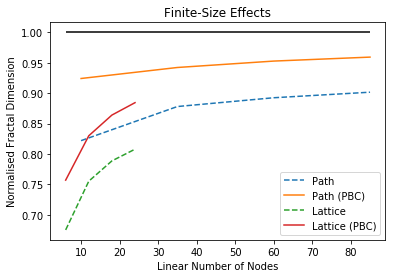

In [20]:
print("---P NO PBC---")
Np, dp_nopbc = d_vs_N(graphs.build_path_graph, Nmin=10, Nmax=100, Nstep=25, PBC=False)
print("---P PBC---")
Np, dp_pbc = d_vs_N(graphs.build_path_graph,  Nmin=10, Nmax=100, Nstep=25, PBC=True)

print("---P NO PBC---")
Nl, dl_nopbc = d_vs_N(graphs.build_lattice_graph, Nmin=6, Nmax=30, Nstep=6, PBC=False)
print("---P PBC---")
Nl, dl_pbc = d_vs_N(graphs.build_lattice_graph, Nmin=6, Nmax=30, Nstep=6, PBC=True)

plt.figure()
plt.plot(Np, dp_nopbc / 1, "--", label="Path")
plt.plot(Np, dp_pbc / 1, "-", label="Path (PBC)")
plt.plot(Nl, dl_nopbc / 2, "--", label="Lattice")
plt.plot(Nl, dl_pbc / 2, "-", label="Lattice (PBC)")
plt.hlines(1, min(Np[0],Nl[0]), max(Np[-1],Nl[-1]))
plt.legend()
plt.title("Finite-Size Effects")
plt.xlabel("Linear Number of Nodes")
plt.ylabel("Normalised Fractal Dimension")
plt.savefig("fse_path.pdf")
plt.show()